<a href="https://colab.research.google.com/github/merlynjocol/DataRuralHub/blob/main/Food_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:

from google.colab import drive
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Food Sustainable System Index**



In [2]:
#Installing libraries mapping 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express
#Install other libraries 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-dlx87hmd
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-dlx87hm

In [ ]:
pip install streamlit-d3-demo

Connecting the data

In [3]:
#Import libraries
import pandas as pd
import io
from pandas import DataFrame, read_csv   #conda install -c anaconda xlrd
from datetime import datetime
from matplotlib import rcParams
from matplotlib import rcParams
import seaborn as sns
import numpy as np


#choroplet map
import warnings
import geopandas
import matplotlib
import matplotlib.pyplot as plt


import geopy
import folium
from folium.plugins import MarkerCluster


#build reports
from pandas_profiling import ProfileReport

#graphs
import os
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)



In [ ]:
#import Graphs D3.js
from streamlit_d3_demo import d3_line

In [4]:
pip install gspread

## Importing Data

### Index BCFN

In [5]:
# load the data from Google Drive
index_BCFN =pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Food_Systems_ChallengeHub/ChallengeHub_Data/1_Food System Sustainability Index/Food-Sustainability-Index-BCFN_2018_V2.xlsm - Sheet2.csv')
index_BCFN .head(3)


,No,Country,Index,food_loss_waste,sustainable_ag,nutrition_challenge
0,1,France,76.1,85.8,71.0,71.4
1,2,Netherlands,75.6,80.7,77.1,69.0
2,3,Canada,75.3,82.1,73.0,70.9


In [6]:
index_BCFN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No                   67 non-null     int64  
 1   Country              67 non-null     object 
 2   Index                67 non-null     float64
 3   food_loss_waste      67 non-null     float64
 4   sustainable_ag       67 non-null     float64
 5   nutrition_challenge  67 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.3+ KB


In [7]:
# load the data from GitHub
url = 'https://raw.githubusercontent.com/merlynjocol/DataRuralHub/main/Data/1_Food%20System%20Sustainability%20Index/Food-Sustainability-Index-BCFN_2018_V2.xlsm%20-%20Sheet2.csv'
df1 = pd.read_csv(url)
df1.head(3)

,No,Country,Index,food_loss_waste,sustainable_ag,nutrition_challenge
0,1,France,76.1,85.8,71.0,71.4
1,2,Netherlands,75.6,80.7,77.1,69.0
2,3,Canada,75.3,82.1,73.0,70.9


Index Global  ( verified CIAT, IPFRI)

In [20]:
index_global =pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Food_Systems_ChallengeHub/ChallengeHub_Data/1_Food System Sustainability Index/Global_Sustainable_Food_Index - Sheet1.csv')
index_global.head(5)

,Country,ISO3,SFS index 2000-2003,SFS index 2004-2006,SFS index 2007-2009,SFS index 2010-2012,SFS index 2013-2016,SFS index 2017
0,Algeria,DZA,0.1633,0.1719,0.2140,0.2903,0.3123,0.3097
1,Argentina,ARG,0.5416,0.5508,0.5697,0.5748,0.5728,0.5700
2,Australia,AUS,0.6761,0.6739,0.6822,0.7026,0.6906,0.6887
3,Austria,AUT,0.6660,0.6604,0.6865,0.7061,0.6982,0.6931
4,Azerbaijan,AZE,0.5005,0.4922,0.5089,0.5161,0.5125,0.5060


In [21]:
index_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              97 non-null     object 
 1   ISO3                 97 non-null     object 
 2   SFS index 2000-2003  91 non-null     float64
 3   SFS index 2004-2006  94 non-null     float64
 4   SFS index 2007-2009  96 non-null     float64
 5   SFS index 2010-2012  97 non-null     float64
 6   SFS index 2013-2016  95 non-null     float64
 7   SFS index 2017       97 non-null     float64
dtypes: float64(6), object(2)
memory usage: 6.2+ KB


### Dataframe of Coordinates Countries

In [22]:
# load the countries coordinates from Google Drive
countries =pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Food_Systems_ChallengeHub/ChallengeHub_Data/Countries/Countries & Territories Taxonomy MVP - C&T Taxonomy with HXL Tags.csv')


In [23]:
countries.rename(columns = {'ISO 3166-1 Alpha 3-Codes':'ISO3'}, inplace = True)
countries.rename(columns = {'English Short':'Country'}, inplace = True)

In [24]:
countries_coordinates = countries.drop(['ID', 'HRinfo ID', 'RW ID', 'm49 numerical code', 'FTS API ID',
       'Appears in UNTERM list', 'Appears in DGACM list',
       'ISO 3166-1 Alpha 2-Codes',
       'x Alpha2 codes', 'x Alpha3 codes', 'Preferred Term', 'm49 Alt Term',
       'ISO Alt Term', 'UNTERM Alt Term', 'FTS Alt Term', 'HRinfo Alt Term',
       'RW Short Name', 'RW API Alt Term', 'French Short',
       'Spanish Short', 'Russian Short', 'Chinese Short', 'Arabic Short',
       'Admin Level', 'Intermediate Region Code',
       'Intermediate Region Name', 'Regex', 'Concatenation'], axis= 1)

In [25]:
countries_coordinates = countries_coordinates.drop(0, axis=0)

In [26]:
countries_coordinates.head(2)

,ISO3,Country,Latitude,Longitude,Region Code,Region Name,Sub-region Code,Sub-region Name
1,AFG,Afghanistan,33.83147477,66.02621828,142,Asia,34,Southern Asia
2,ALA,Aland Islands,NaN,NaN,150,Europe,154,Northern Europe


## What countries and regions are covering BCFN index? 

In [27]:
index_BCFN.columns

Index(['No ', 'Country', 'Index', 'food_loss_waste', 'sustainable_ag',
       'nutrition_challenge'],
      dtype='object')

In [147]:
# Cross table BCFN index with Countries to obtain the regions and subregions
countries_BCFN = index_BCFN.merge(countries_coordinates, on = "Country", how = "inner" )

### Dataframe final BCFN index 

In [149]:
#Dataframe final BCFN index with coorindates, region and name of the country
country_BCFNindex = countries_BCFN.copy()
country_BCFNindex.head(2)

,No,Country,Index,food_loss_waste,sustainable_ag,nutrition_challenge,ISO3,Latitude,Longitude,Region Code,Region Name,Sub-region Code,Sub-region Name
0,1,France,76.1,85.8,71.0,71.4,FRA,46.6984015,2.350055968,150,Europe,155,Western Europe
1,2,Netherlands,75.6,80.7,77.1,69.0,NLD,52.26998137,5.675062933,150,Europe,155,Western Europe


In [157]:
country_BCFNindex.isnull().any()

No                     False
Country                False
Index                  False
food_loss_waste        False
sustainable_ag         False
nutrition_challenge    False
ISO3                   False
Latitude               False
Longitude              False
Region Code            False
Region Name            False
Sub-region Code        False
Sub-region Name        False
dtype: bool

### Groupby Regions and Subregions

In [29]:
total_countries_BCFN = countries_BCFN['Country'].count()
print( "BCFN Index cover only",  total_countries_BCFN, "countries")

BCFN Index cover only 66 countries


In [30]:
#Regions 
regions_BCFN = countries_BCFN.groupby(["Region Name"]).agg({'Index': ['count', 'mean'], 
                                                            'food_loss_waste': ["mean"],
                                                            'sustainable_ag':["mean"],
                                                            'nutrition_challenge':["mean"]}).round(2)
regions_BCFN

Index        food_loss_waste sustainable_ag nutrition_challenge
            count   mean            mean           mean                mean
Region Name                                                                
Africa         20  64.10           69.60          67.16               55.55
Americas        6  69.62           75.27          69.77               63.83
Asia           11  64.72           65.05          66.01               63.06
Europe         28  68.30           69.36          68.47               67.04
Oceania         1  71.80           77.50          73.40               64.60

In [31]:
#Regions 
subregions_BCFN = countries_BCFN.groupby(["Region Name", 'Sub-region Name']).agg({'Index': ['count', 'mean'], 
                                                            'food_loss_waste': ["mean"],
                                                            'sustainable_ag':["mean"],
                                                            'nutrition_challenge':["mean"]}).round(2)
subregions_BCFN

Index  ... nutrition_challenge
                                            count  ...                mean
Region Name Sub-region Name                        ...                    
Africa      Northern Africa                     4  ...               57.30
            Sub-Saharan Africa                 16  ...               55.11
Americas    Latin America and the Caribbean     4  ...               63.15
            Northern America                    2  ...               65.20
Asia        Eastern Asia                        3  ...               73.20
            South-eastern Asia                  1  ...               54.90
            Southern Asia                       1  ...               52.50
            Western Asia                        6  ...               61.12
Europe      Eastern Europe                      7  ...               61.87
            Northern Europe                     8  ...               69.26
            Southern Europe                     7  ...               68.13
            Western Europe                      6  ...               68.82
Oceania     Australia and New Zealand           1  ...               64.60

[13 rows x 5 columns]

## What countries are in the Global Index?

In [105]:
index_global.columns

Index(['Country', 'ISO3', 'SFS index 2000-2003', 'SFS index 2004-2006',
       'SFS index 2007-2009', 'SFS index 2010-2012', 'SFS index 2013-2016',
       'SFS index 2017'],
      dtype='object')

In [106]:
#how many names are not correct ?
comparison = index_global['Country'].isin(countries_coordinates['Country']).value_counts()
comparison

True     94
False     3
Name: Country, dtype: int64

In [107]:
index_global.shape

(97, 8)

In [108]:
# Cross table index_global with Countries to obtain the regions and subregions and the Lat and Long
countries_globalindex = index_global.merge(countries_coordinates, on = "ISO3", how = "inner" )
countries_globalindex .reset_index()
countries_globalindex.head(2)

,Country_x,ISO3,SFS index 2000-2003,SFS index 2004-2006,SFS index 2007-2009,SFS index 2010-2012,SFS index 2013-2016,SFS index 2017,Country_y,Latitude,Longitude,Region Code,Region Name,Sub-region Code,Sub-region Name
0,Algeria,DZA,0.1633,0.1719,0.2140,0.2903,0.3123,0.3097,Algeria,28.16474462,2.63351219,2,Africa,15,Northern Africa
1,Argentina,ARG,0.5416,0.5508,0.5697,0.5748,0.5728,0.5700,Argentina,-34.98567234,-65.12225892,19,Americas,419,Latin America and the Caribbean


In [109]:
countries_globalindex.shape

(97, 15)

In [150]:
#adding a columns "compare_countries" to know the match between 2 columns (name of the country)
countries_globalindex['compare_countries']= np.where(countries_globalindex['Country_x'] == countries_globalindex['Country_y'],'True', 'False') 


In [93]:
#checking what are the countries that don't match
uncommon_countries = countries_globalindex[countries_globalindex['compare_countries'] == 'False']
uncommon_countries

,Country_x,ISO3,SFS index 2000-2003,SFS index 2004-2006,SFS index 2007-2009,SFS index 2010-2012,SFS index 2013-2016,SFS index 2017,Country_y,Latitude,Longitude,Region Code,Region Name,Sub-region Code,Sub-region Name,compare_countries
20,Ivory Coast,CIV,NaN,NaN,0.5083,0.5096,0.5104,0.5041,Cote d'Ivoire,7.630087005,-5.552402136,2,Africa,202,Sub-Saharan Africa,False
21,Czechia,CZE,0.5762,0.5746,0.5741,0.5918,0.5935,0.5891,Czech Republic,49.74240068,15.34943448,150,Europe,151,Eastern Europe,False
94,Vietnam,VNM,0.4039,0.4038,0.4250,0.4338,0.4289,0.4277,Viet Nam,16.64893259,106.3103686,142,Asia,35,South-eastern Asia,False


I decided to let the names of Country_y (data from "Countries df"). 

Explanation: Though the "Viet Nam" spelling is used by the UN and the Vietnam government itself.
https://politics.stackexchange.com/questions/25642/preferred-or-correct-english-spelling-vietnam-or-viet-nam

In [141]:
# drop column "country_x" and "compare_countries"
countries_globalindex1 = countries_globalindex.drop(['Country_x','compare_countries' ],axis=1 )

In [130]:
countries_globalindex1.columns

Index(['ISO3', 'SFS index 2000-2003', 'SFS index 2004-2006',
       'SFS index 2007-2009', 'SFS index 2010-2012', 'SFS index 2013-2016',
       'SFS index 2017', 'Country_y', 'Latitude', 'Longitude', 'Region Code',
       'Region Name', 'Sub-region Code', 'Sub-region Name'],
      dtype='object')

In [138]:
#change the position column "country_y"
country_globalindex1 = countries_globalindex1[['Country_y', 'ISO3', 'SFS index 2000-2003', 'SFS index 2004-2006',
       'SFS index 2007-2009', 'SFS index 2010-2012', 'SFS index 2013-2016',
       'SFS index 2017', 'Latitude', 'Longitude', 'Region Code',
       'Region Name', 'Sub-region Code', 'Sub-region Name']]


In [151]:
country_globalindex1.rename(columns = {'Country_y':'Country'}, inplace = True)

### Dataframe final Global FS index

In [140]:
# dataframe Global FSindex with coordinates, ISO,  offical name country and regions
country_gindex = country_globalindex1.copy()
country_gindex .shape

(97, 14)

### Groupby Regions and subregions

In [94]:
total_countries_globalindex = countries_globalindex['Country_x'].count()
print( "Global Food Sustainablle Index cover",  total_countries_globalindex, "countries")

Global Food Sustainablle Index cover 97 countries


In [49]:
#Regions 
regions_globali = countries_globalindex.groupby(["Region Name"]).agg({'SFS index 2017': ['count', 'mean']}).round(2)
regions_globali

SFS index 2017      
                     count  mean
Region Name                     
Africa                  28  0.40
Americas                20  0.56
Asia                    24  0.44
Europe                  23  0.62
Oceania                  2  0.71

In [50]:
#Regions 
subregions_globali = countries_globalindex.groupby(["Region Name", 'Sub-region Name']).agg({'SFS index 2017': ['count', 'mean']}).round(2)
subregions_globali

SFS index 2017      
                                                     count  mean
Region Name Sub-region Name                                     
Africa      Northern Africa                              5  0.34
            Sub-Saharan Africa                          23  0.42
Americas    Latin America and the Caribbean             18  0.54
            Northern America                             2  0.71
Asia        Central Asia                                 2  0.53
            Eastern Asia                                 2  0.59
            South-eastern Asia                           8  0.47
            Southern Asia                                5  0.32
            Western Asia                                 7  0.43
Europe      Eastern Europe                               9  0.58
            Northern Europe                              5  0.67
            Southern Europe                              3  0.60
            Western Europe                               6  0.67
Oceania     Australia and New Zealand                    2  0.71

### Mapping the Indexes

In [153]:
country_BCFNindex.columns

Index(['No ', 'Country', 'Index', 'food_loss_waste', 'sustainable_ag',
       'nutrition_challenge', 'ISO3', 'Latitude', 'Longitude', 'Region Code',
       'Region Name', 'Sub-region Code', 'Sub-region Name'],
      dtype='object')

In [154]:
country_gindex.columns

Index(['Country', 'ISO3', 'SFS index 2000-2003', 'SFS index 2004-2006',
       'SFS index 2007-2009', 'SFS index 2010-2012', 'SFS index 2013-2016',
       'SFS index 2017', 'Latitude', 'Longitude', 'Region Code', 'Region Name',
       'Sub-region Code', 'Sub-region Name'],
      dtype='object')

In [184]:
# dataframe for mapping 
index_map = country_gindex.merge(country_BCFNindex, on = ["ISO3",'Latitude', 'Longitude', 'Region Code',
       'Region Name', 'Sub-region Code', 'Sub-region Name'], how = "outer" )
index_map.reset_index()
index_map.head(2)



,Country_x,ISO3,SFS index 2000-2003,SFS index 2004-2006,SFS index 2007-2009,SFS index 2010-2012,SFS index 2013-2016,SFS index 2017,Latitude,Longitude,Region Code,Region Name,Sub-region Code,Sub-region Name,No,Country_y,Index,food_loss_waste,sustainable_ag,nutrition_challenge
0,Algeria,DZA,0.1633,0.1719,0.2140,0.2903,0.3123,0.3097,28.16474462,2.63351219,2,Africa,15,Northern Africa,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,ARG,0.5416,0.5508,0.5697,0.5748,0.5728,0.5700,-34.98567234,-65.12225892,19,Americas,419,Latin America and the Caribbean,13.0,Argentina,71.5,83.4,66.9,64.1


### Checking values between columns of countries names

Comparison names, fill NaN, del columns 


In [180]:
#Compare
index_map['compare_countries']= np.where(index_map['Country_x'] ==index_map['Country_y'],'True', 'False') 


In [182]:
#dubset to know what are the issue
dfset = index_map[["Country_x", "ISO3","Country_y","compare_countries" ]]


In [183]:
uncommon_names = dfset[dfset['compare_countries'] == 'False']

In [173]:
#function to select a row based on column value, checking the values 
index_map.loc[index_map['Country_y'] == "Croatia"]

,Country_x,ISO3,SFS index 2000-2003,SFS index 2004-2006,SFS index 2007-2009,SFS index 2010-2012,SFS index 2013-2016,SFS index 2017,Latitude,Longitude,Region Code,Region Name,Sub-region Code,Sub-region Name,No,Country_y,Index,food_loss_waste,sustainable_ag,nutrition_challenge,compare_countries
97,NaN,HRV,NaN,NaN,NaN,NaN,NaN,NaN,45.18877041,16.42353441,150,Europe,39,Southern Europe,14.0,Croatia,71.4,77.1,66.3,70.9,False


In [187]:
#Remplace the names of NaN values in Country_X (Oficial UN names) with the value from other colums ("Country_y")
index_map['Country_x'].fillna(index_map['Country_y'], inplace=True)


In [189]:
map_2index = index_map.drop(['Country_y'], axis=1)

In [192]:
map_2index.isnull().any()


Country_x              False
ISO3                   False
SFS index 2000-2003     True
SFS index 2004-2006     True
SFS index 2007-2009     True
SFS index 2010-2012     True
SFS index 2013-2016     True
SFS index 2017          True
Latitude               False
Longitude              False
Region Code            False
Region Name            False
Sub-region Code        False
Sub-region Name        False
No                      True
Index                   True
food_loss_waste         True
sustainable_ag          True
nutrition_challenge     True
dtype: bool

### Tricks code

In [195]:
#Checking the  null values - NaN- in a column
nan_values_iso = map_2index[map_2index['ISO3'].isna()]
nan_values_iso 

,Country_x,ISO3,SFS index 2000-2003,SFS index 2004-2006,SFS index 2007-2009,SFS index 2010-2012,SFS index 2013-2016,SFS index 2017,Latitude,Longitude,Region Code,Region Name,Sub-region Code,Sub-region Name,No,Index,food_loss_waste,sustainable_ag,nutrition_challenge


Importing Map from Geopandas

In [196]:
#importing the dataset Geopandas
warnings.filterwarnings('ignore')
%matplotlib inline
geopandas.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

In [197]:
#importing the  dataset from geopandas with geoinformation Lat- Long
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
print("Geometry Column Name : ", world.geometry.name)
print("Dataset Size : ", world.shape)
world.head()

Geometry Column Name :  geometry
Dataset Size :  (177, 6)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


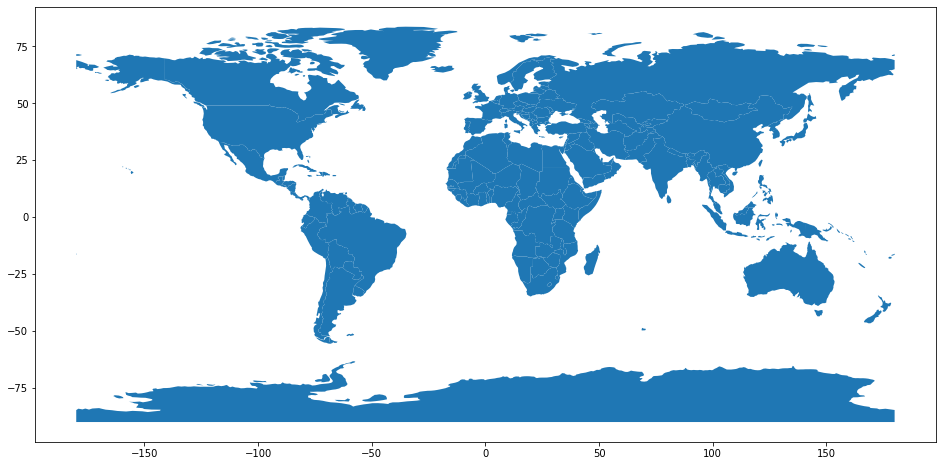

In [198]:
#This is the plot that bring the dataset above! :)
world.plot(figsize=(20,8));

In [220]:
import plotly.express as px

In [208]:
#merge the 2 datasets: geopandas + map_2index
# I recommend to merge first the dataset world and after the pandas dataframe, to expose the geodata, at the contrary doesn't work
maping_index = world.merge(map_2index, how="left", left_on=['name'], right_on=['Country_x'])
print("Type of DataFrame : ", type(maping_index))
maping_index.head(5)


Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'>


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country_x,ISO3,SFS index 2000-2003,SFS index 2004-2006,SFS index 2007-2009,SFS index 2010-2012,SFS index 2013-2016,SFS index 2017,Latitude,Longitude,Region Code,Region Name,Sub-region Code,Sub-region Name,No,Index,food_loss_waste,sustainable_ag,nutrition_challenge
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,TZA,0.4226,0.4168,0.4377,0.4239,0.4014,0.4079,-6.273241244,34.79620168,2,Africa,202,Sub-Saharan Africa,30.0,67.4,70.3,70.5,61.3
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CAN,NaN,NaN,0.7242,0.7353,0.7268,0.7193,61.4126317,-98.23039804,19,Americas,21,Northern America,3.0,75.3,82.1,73.0,70.9
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
#function to select a row based on column value, checking the values 
maping_index.loc[maping_index['Country_x'] == "Vier Nam"]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country_x,ISO3,SFS index 2000-2003,SFS index 2004-2006,SFS index 2007-2009,SFS index 2010-2012,SFS index 2013-2016,SFS index 2017,Latitude,Longitude,Region Code,Region Name,Sub-region Code,Sub-region Name,No,Index,food_loss_waste,sustainable_ag,nutrition_challenge


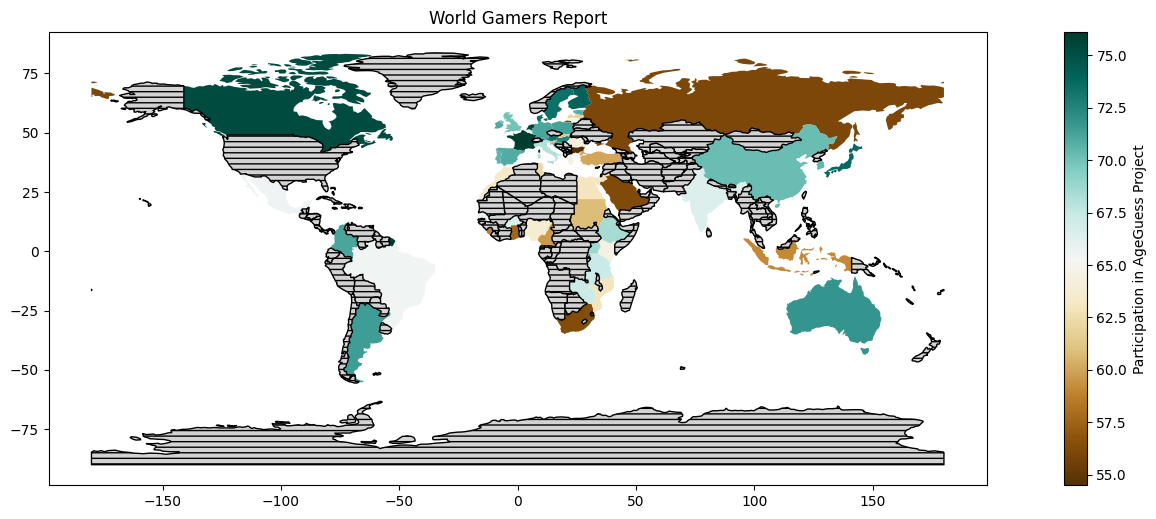

In [215]:
#Cholorplet Gamers of AgeGuess around the world. See the spaces in gray                   
# Increase the sharpness of the display
plt.rcParams['figure.dpi'] = 100
maping_index.plot("Index", figsize=(20,6),
                           legend=True,
                           legend_kwds={"label":"Participation in AgeGuess Project"},
                           cmap=plt.cm.BrBG,
                           missing_kwds={
                               "color":"lightgrey",
                               "edgecolor":"black",
                               "hatch":"---",
                               "label":"Missing Values",
                                                     }
                          )

plt.title("World Gamers Report");

In [1]:
#df = px.data.gapminder().query("index")
fig = px.choropleth(maping_index, locations = "iso_a3",
                    color="Index", # variable
                    hover_name="Country_x",
                    color_continuous_scale= px.colors.sequential.Plasma)
fig.show()



NameError: ignored

In [219]:
import plotly.graph_objects as go


In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=maping_index['iso_a3'],
    z=maping_index['Index'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=maping_index['Country_x'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Index Value"
))

fig.update_layout(
    title_text='2011 US Agriculture Exports by State<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),